In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### What is multivariarte analysis?
- It is a statistical method used in EDA to analyze relationships between multiple variables in a dataset. It helps identify pattern and outliers in large sets of data.

#### Why it is important do multivariate analysis?
- It is crucial in EDA because it allows you to examine the relationships between multiple variables simultaneously, providing a deeper understanding of complex patterns and interactions within your data, ultimately leading to more informed insights and better decision-making based on the data.

#### What are the multivariate analysis techniques used in EDA?
- Correlation matrices
- Principal component analysis (PCA)
- Cluster analysis
- Pair plots

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


### Property_type vs Price

In [6]:
df['property_type'].value_counts()

property_type
house    859
Name: count, dtype: int64

In [7]:
df['property_type'].isnull().sum()

2817

In [8]:
df['property_type'].fillna('flat',inplace=True)

In [10]:
df['property_type'].value_counts()

property_type
flat     2817
house     859
Name: count, dtype: int64

<Axes: xlabel='property_type', ylabel='price'>

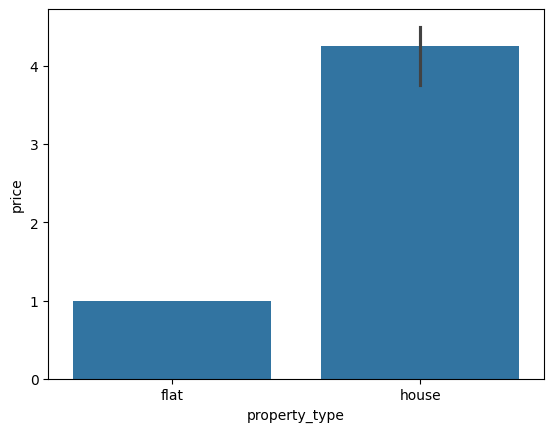

In [11]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price'>

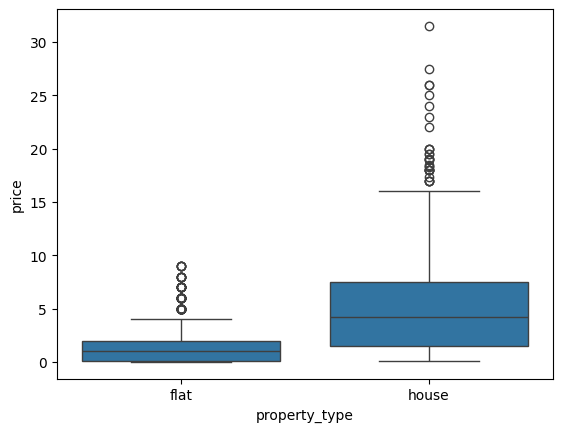

In [13]:
sns.boxplot(x=df['property_type'], y=df['price'])

#### property_type vs area

<Axes: xlabel='property_type', ylabel='built_up_area'>

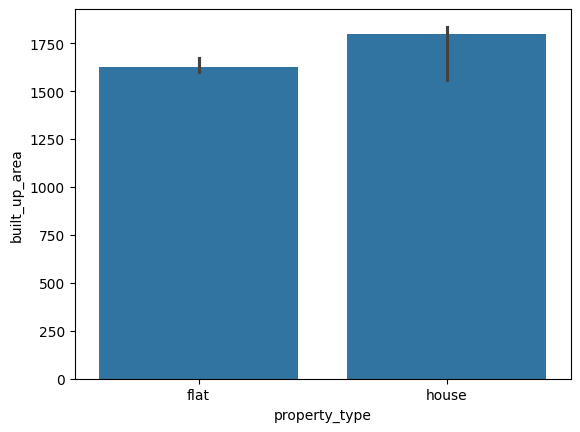

In [14]:
sns.barplot(x=df['property_type'], y=df['built_up_area'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

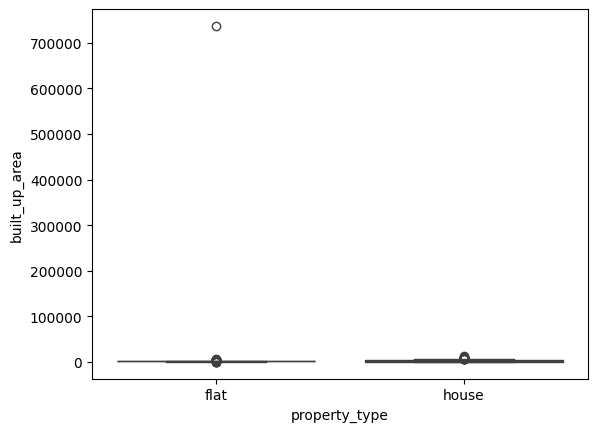

In [15]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [16]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585811
std       17942.880238
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

In [18]:
df[df['built_up_area'] == 737147.000000]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2484,hcbs sports ville,0.03,sohna road,4.0,750000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,flat,NaN,737147.0,NaN,0,0,0,0,0,0,44


In [19]:
# removing outliers
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

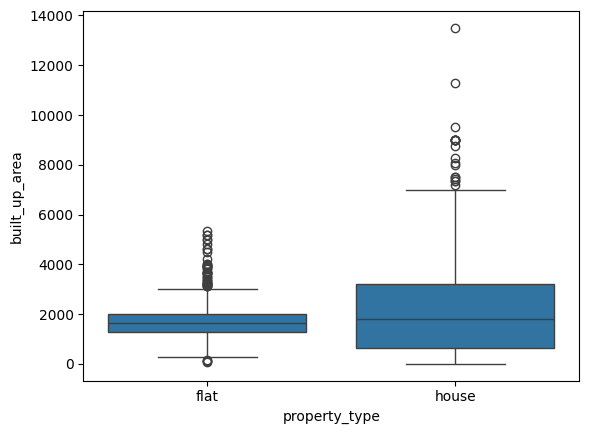

In [20]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

#### property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

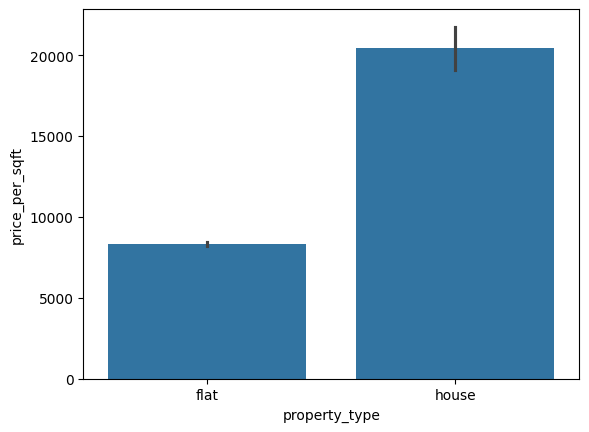

In [21]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

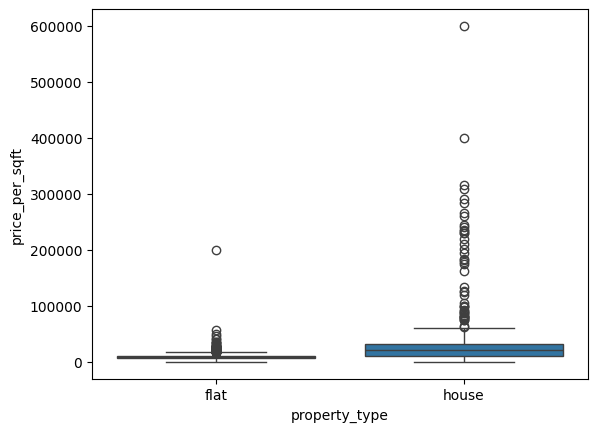

In [22]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

In [23]:
# check outliers
df[df['price_per_sqft'] > 100000][['property_type', 'society','sector','price','price_per_sqft','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
73,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),NaN,400.0,NaN
182,house,independent,sector 12,3.50,133079.0,263.0,Plot area 263(24.43 sq.m.)Built Up area: 4800 ...,NaN,4800.0,4400.0
189,house,independent,sector 4,0.60,105263.0,57.0,Plot area 57(5.3 sq.m.),NaN,57.0,NaN
319,house,rk excelo,sector 12,0.60,120000.0,50.0,Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...,NaN,30.0,15.0
477,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
508,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN
527,house,eros rosewood villas,sector 49,2.75,178571.0,154.0,Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...,NaN,NaN,1650.0
561,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,NaN,NaN,1600.0
573,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),NaN,402.0,NaN
676,house,independent,sector 54,3.75,234375.0,160.0,Plot area 160(14.86 sq.m.),NaN,160.0,NaN


In [24]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


#### property_type vs bedRoom

<Axes: xlabel='bedRoom', ylabel='property_type'>

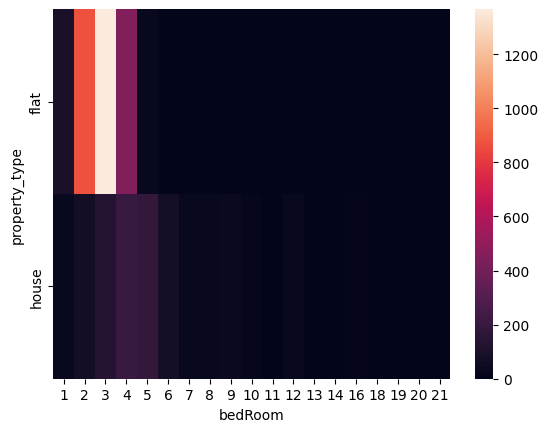

In [27]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [26]:
# checking outliers
df[df['bedRoom'] >= 10]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
39,independent,2.25,sector 13,6944.0,3240.0,Carpet area: 360 (301.01 sq.m.),10,10,2,1.0,East,Undefined,house,NaN,NaN,360.0,0,0,0,0,0,1,0
48,independent,8.00,sector 56,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10,10,3+,4.0,NaN,Relatively New,house,NaN,8286.0,NaN,1,1,0,1,0,0,107
51,laxmi garden sector-11,1.50,sector 11,12820.0,1170.0,Plot area 130(108.7 sq.m.),12,9,1,3.0,East,Relatively New,house,NaN,1170.0,NaN,1,1,0,1,1,2,106
153,shivpuri,2.40,sector 7,8889.0,2700.0,Plot area 300(250.84 sq.m.),10,5,3,2.0,North,Old Property,house,NaN,2700.0,NaN,1,1,0,1,0,1,8
230,independent,9.25,sector 31,39530.0,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 ...,12,12,3+,4.0,North-East,New Property,house,NaN,262.0,260.0,0,1,0,1,1,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3654,independent,4.50,sector 24,33333.0,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 ...,10,8,3+,4.0,East,Relatively New,house,NaN,160.0,150.0,0,1,1,0,0,2,56
3694,uppal southend,6.75,sector 49,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,house,NaN,232.0,NaN,1,1,0,1,1,2,49
3729,private house,7.05,sector 55,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,house,NaN,1503.0,NaN,0,0,0,0,1,0,57
3753,independent,10.50,sector 26,43210.0,2430.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,12,12,3+,4.0,North-East,Relatively New,house,NaN,300.0,270.0,0,1,0,1,0,2,72


#### property_type vs floorNum

<Axes: xlabel='property_type', ylabel='floorNum'>

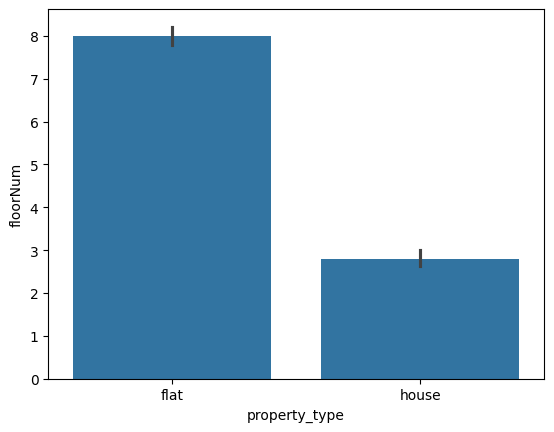

In [28]:
sns.barplot(x=df['property_type'], y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

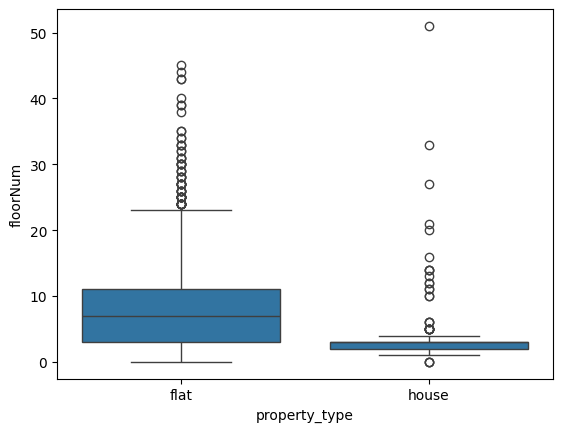

In [29]:
sns.boxplot(x=df['property_type'], y=df['floorNum'])

In [30]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61
216,satya the hermitage,3.15,sector 103,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12.0,East,Undefined,house,NaN,4700.0,NaN,0,0,0,0,0,1,61
548,indiabulls centrum park,3.25,sector 103,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,house,NaN,4000.0,NaN,0,0,0,0,0,1,51
719,ninex city,1.75,sector 76,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,house,NaN,NaN,2800.0,0,0,0,0,0,1,0
894,spaze privy,3.09,sector 72,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,14.0,East,Relatively New,house,NaN,3653.0,2922.0,0,1,0,0,0,2,33
933,suncity avenue 76,0.75,sector 76,10067.0,745.0,Plot area 745(69.21 sq.m.)Built Up area: 745 s...,2,2,2,11.0,North-East,New Property,house,NaN,745.0,NaN,0,0,0,0,0,1,40
1760,independent,1.80,sector 92,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,house,NaN,2360.0,NaN,0,0,0,0,0,1,0
2020,godrej meridien,5.60,sector 106,14000.0,4000.0,Plot area 4000(371.61 sq.m.),5,4,3+,33.0,North-East,New Property,house,NaN,4000.0,NaN,1,1,1,1,0,1,151
2265,greenopolis,0.70,sector 89,5397.0,1297.0,Built Up area: 1297 (120.5 sq.m.),2,2,2,14.0,North-East,Undefined,house,NaN,1297.0,NaN,0,0,0,0,0,1,0
2319,spaze privy,3.10,sector 72,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,house,NaN,3653.0,NaN,0,0,0,0,0,1,0


In [31]:
# conclusion houses(villa) but in apartments

In [32]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


<Axes: xlabel='agePossession', ylabel='property_type'>

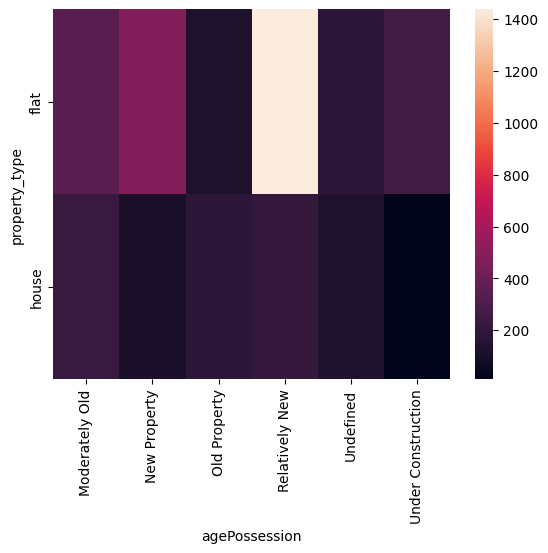

In [33]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

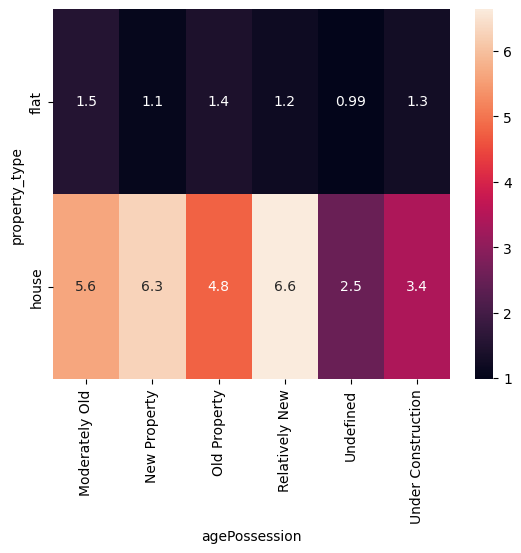

In [34]:
sns.heatmap(pd.pivot_table(df,index='property_type', columns='agePossession', values='price', aggfunc='mean'), annot=True)

<Axes: xlabel='bedRoom', ylabel='property_type'>

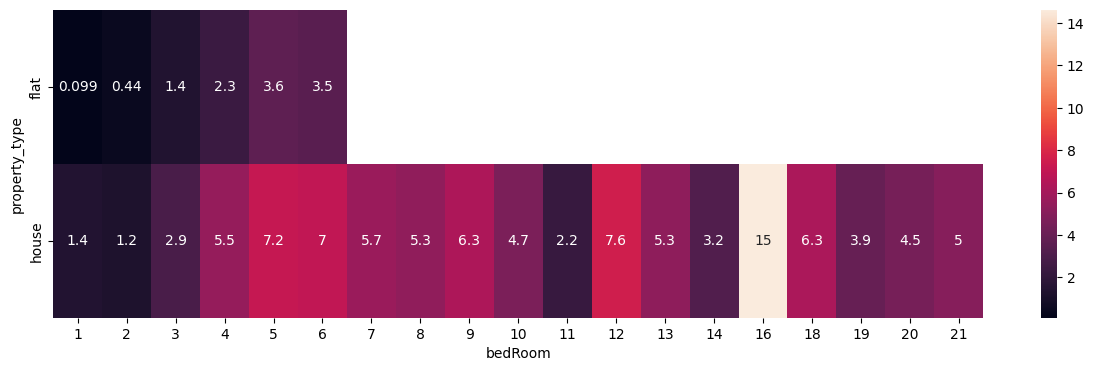

In [35]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type', columns='bedRoom',values='price',aggfunc='mean'), annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

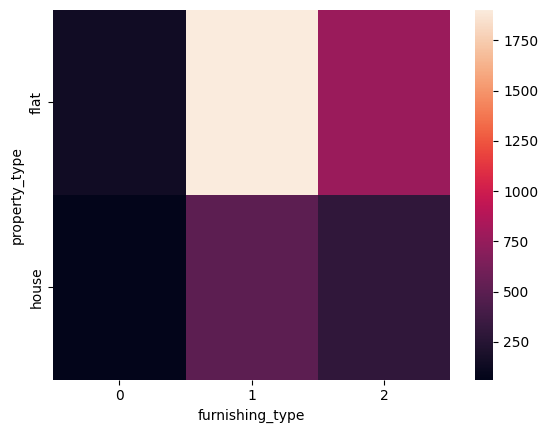

In [36]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

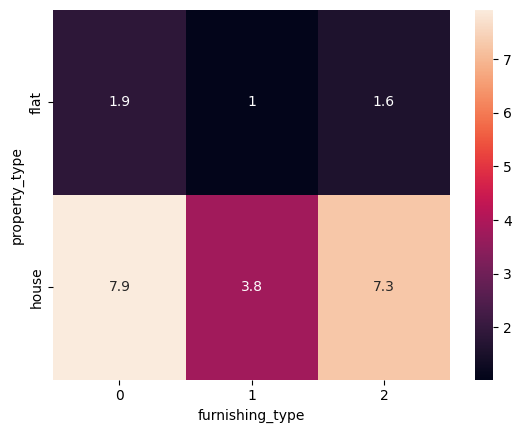

In [37]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean'), annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

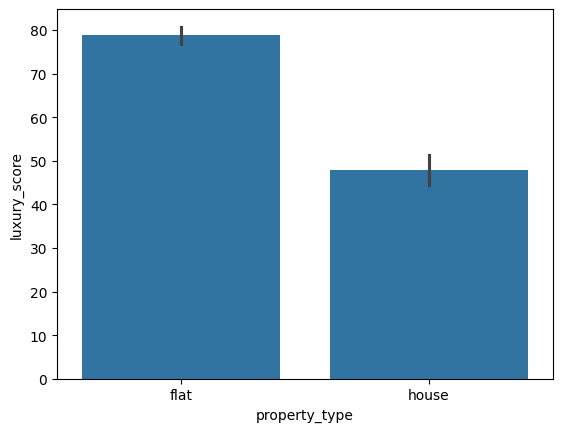

In [38]:
sns.barplot(x=df['property_type'], y=df['luxury_score'])

<Axes: xlabel='property_type', ylabel='luxury_score'>

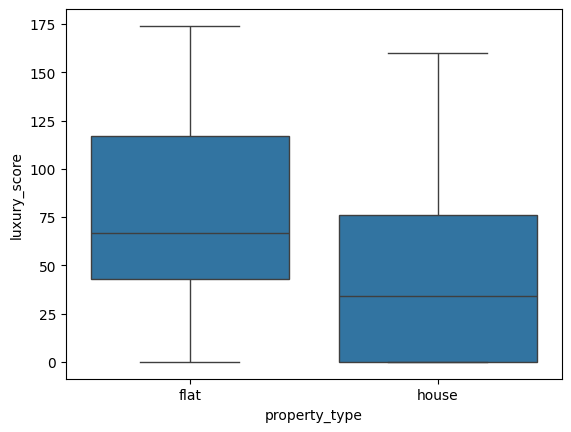

In [39]:
sns.boxplot(x=df['property_type'], y=df['luxury_score'])

In [40]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


<Axes: xlabel='sector', ylabel='property_type'>

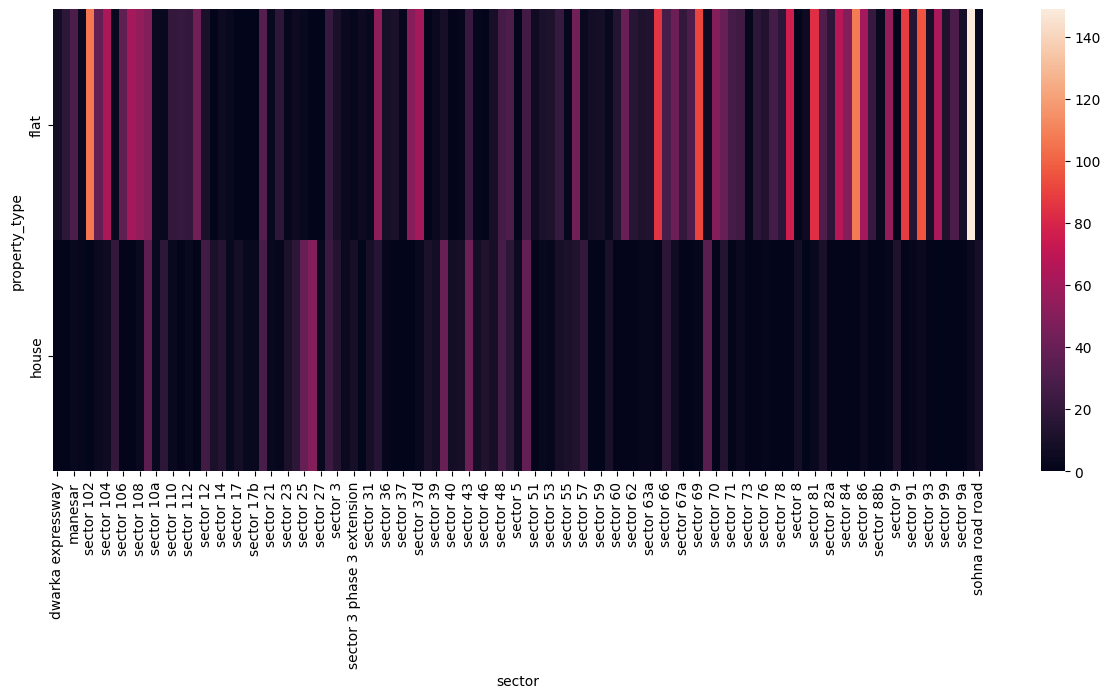

In [41]:
# Sector Analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'], df['sector'].sort_index()))

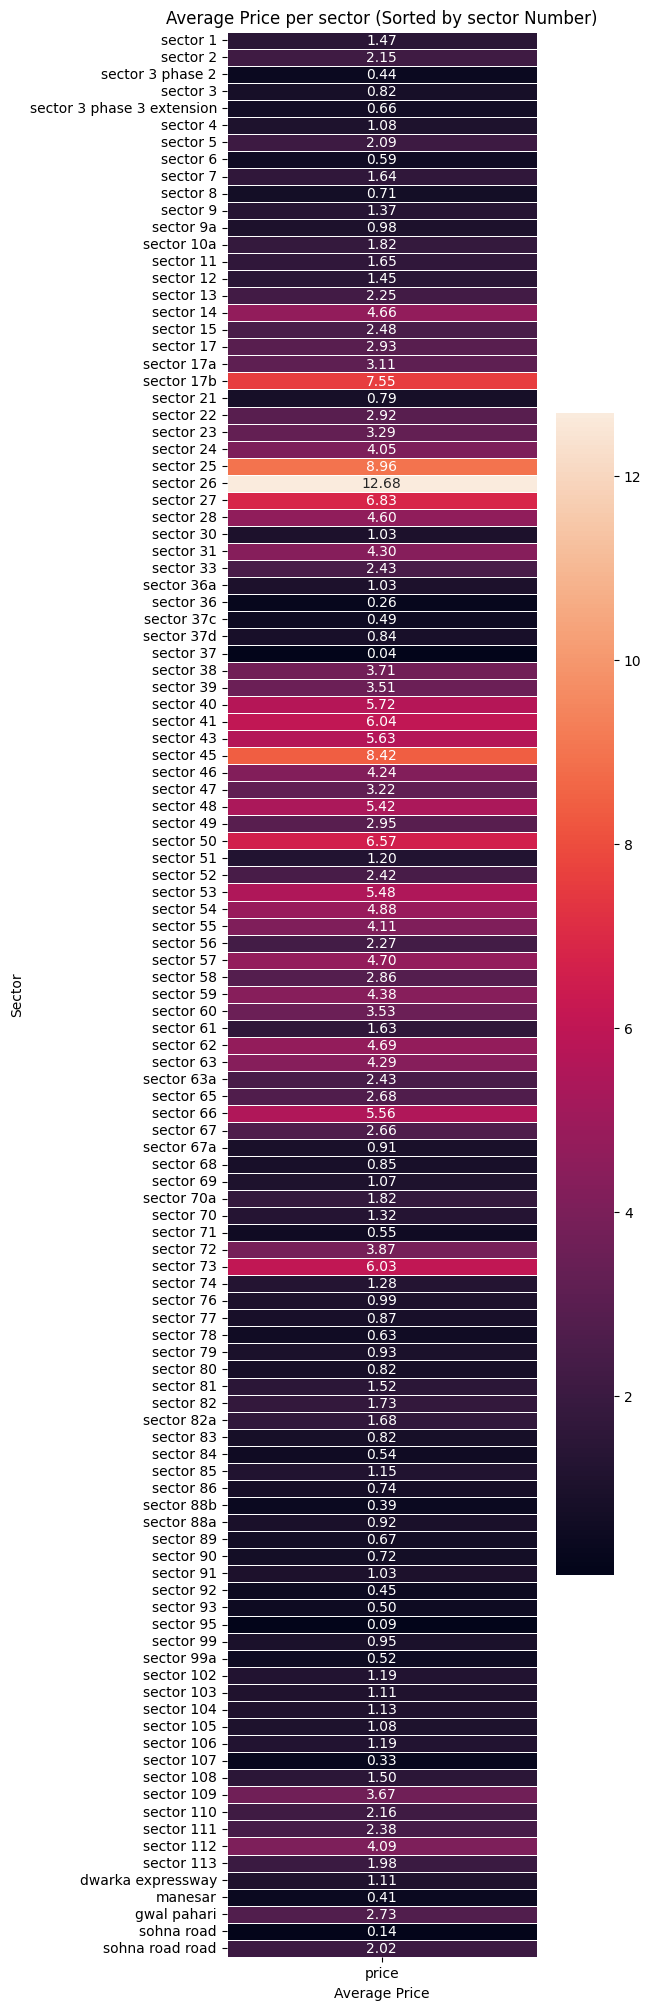

In [42]:
# sector analysis
import re
# group by 'sector' and calculate the avg price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf') #return a large number for non-numbered sectors
    
avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per sector (Sorted by sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

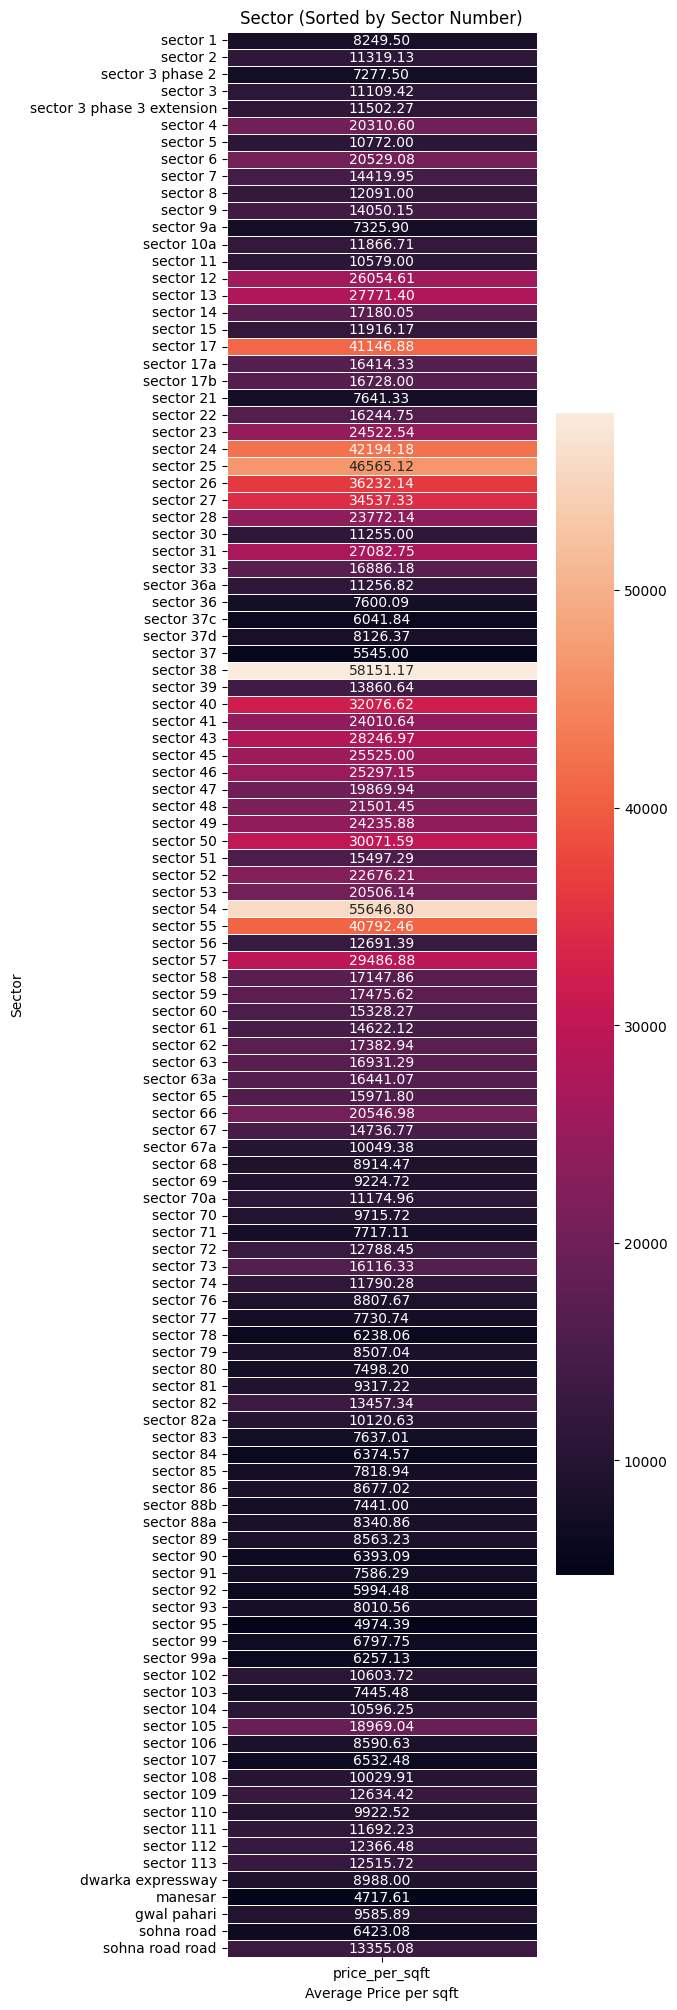

In [43]:
avg_price_per_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()
avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5,25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt='.2f', linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

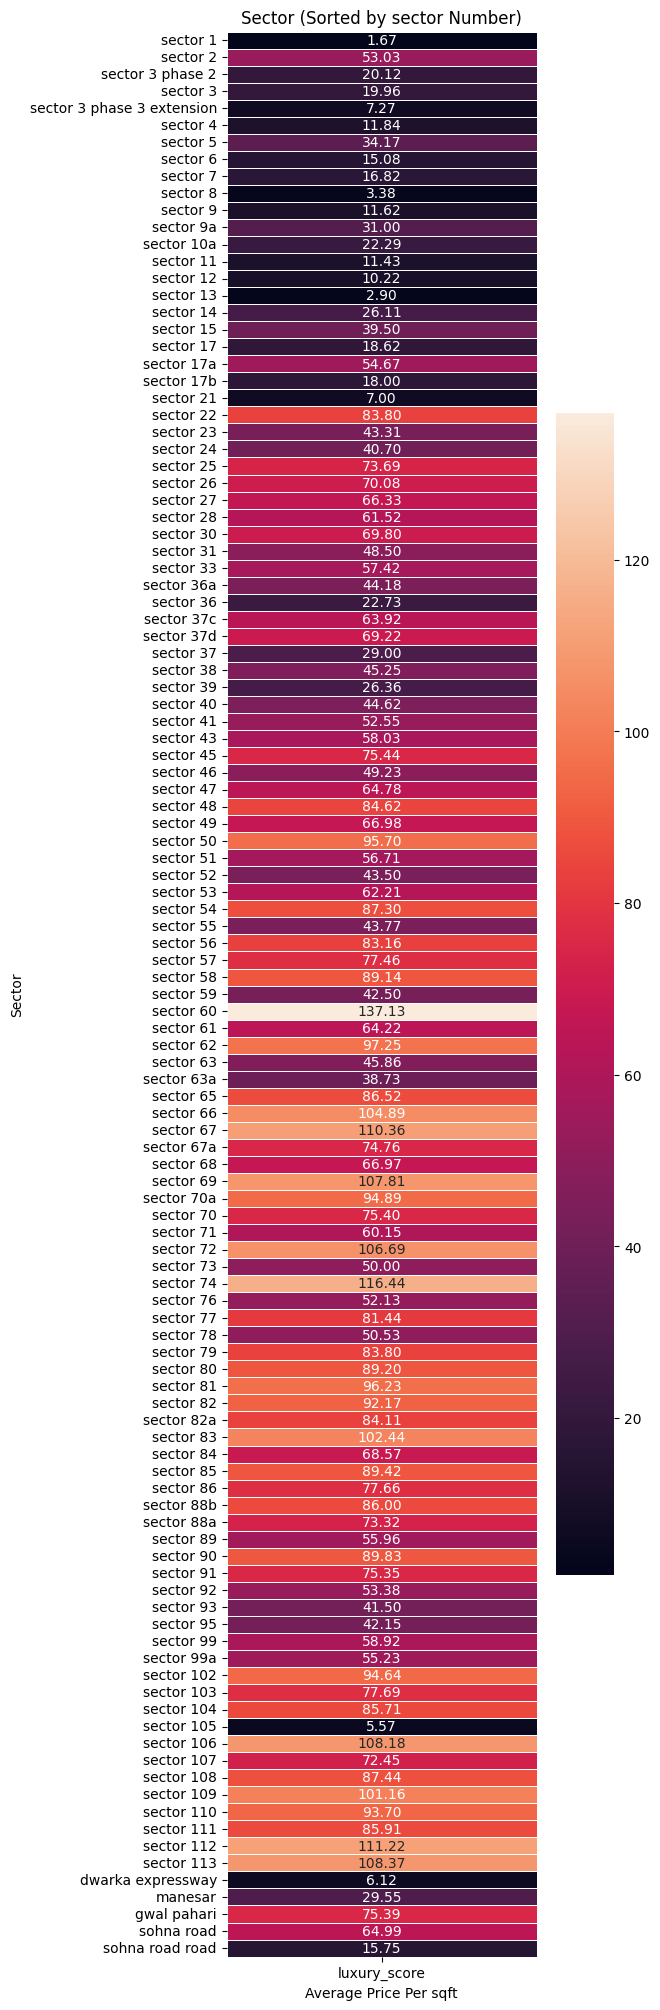

In [44]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()
luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5,25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by sector Number)')
plt.xlabel('Average Price Per sqft')
plt.ylabel('Sector')
plt.show()

In [45]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


#### price

<Axes: xlabel='area', ylabel='price'>

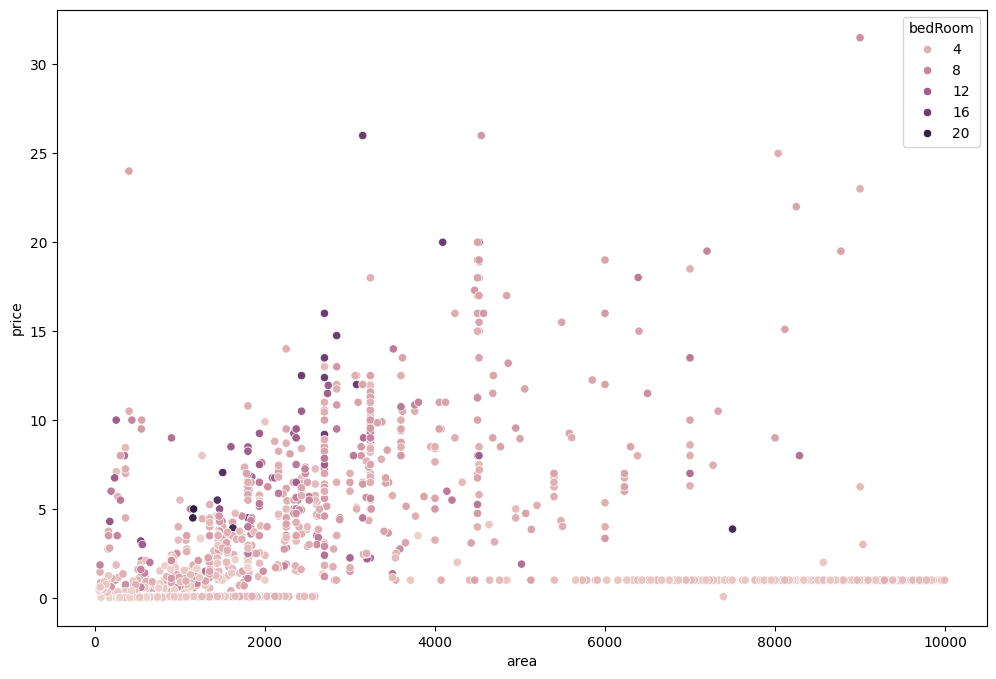

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

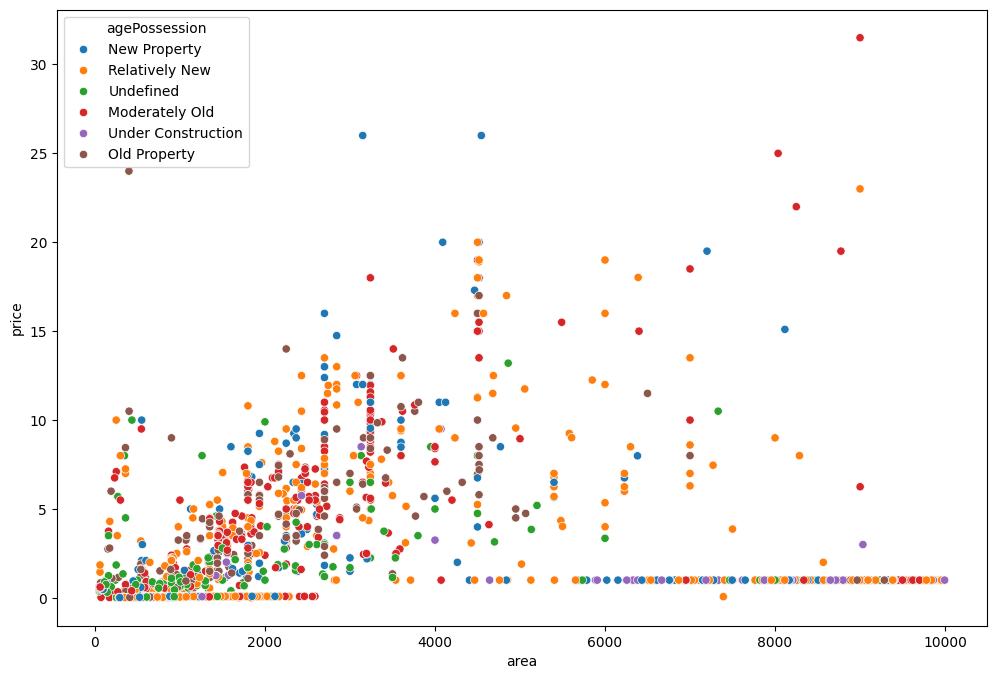

In [49]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

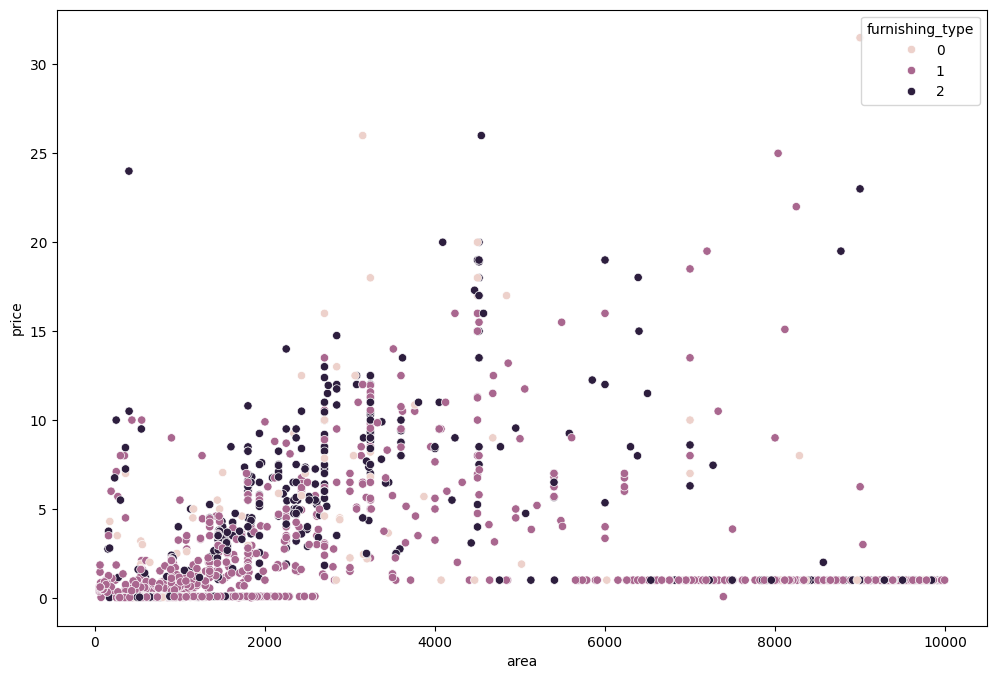

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'], hue=df['furnishing_type'])

<Axes: xlabel='bedRoom', ylabel='price'>

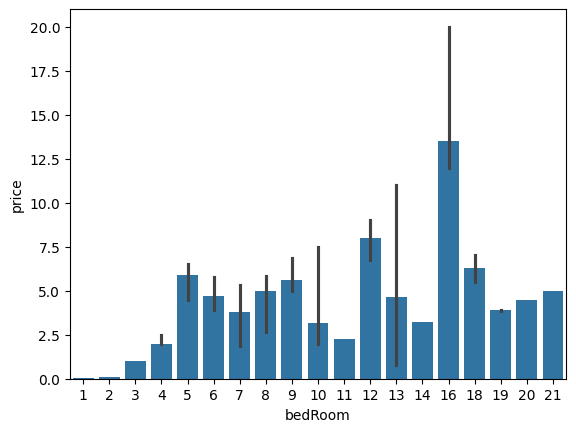

In [51]:
sns.barplot(x=df['bedRoom'],y=df['price'], estimator=np.median)

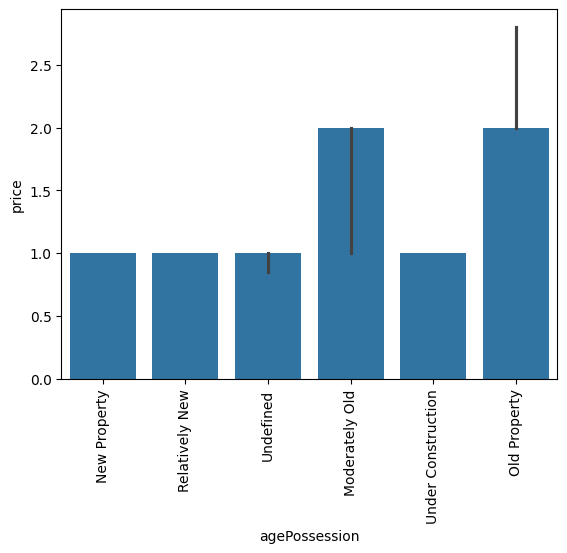

In [52]:
sns.barplot(x=df['agePossession'], y=df['price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

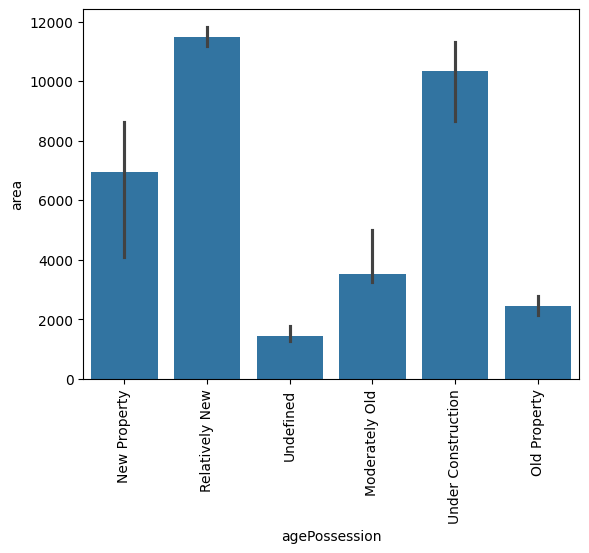

In [53]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

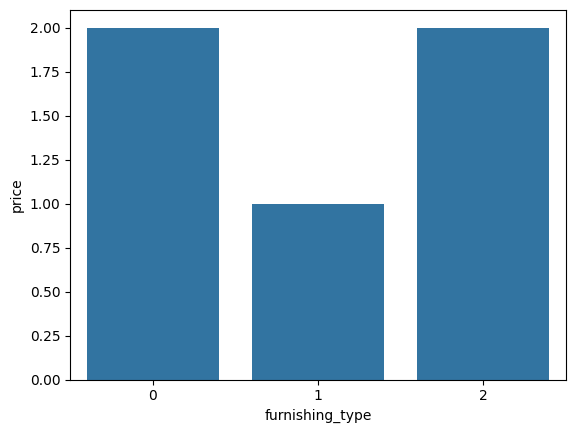

In [54]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

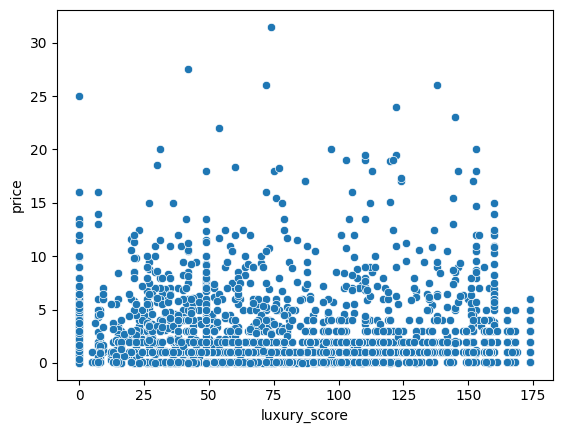

In [56]:
sns.scatterplot(x=df['luxury_score'],y=df['price'])

#### Correlation

<Axes: >

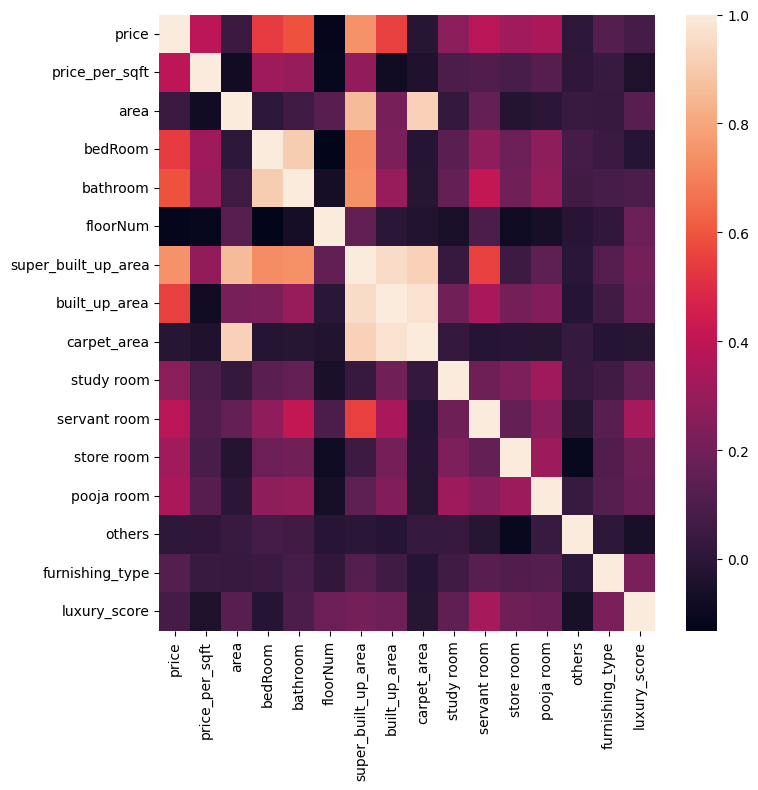

In [60]:
plt.figure(figsize=(8,8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=False)


In [62]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.745295
bathroom               0.593054
built_up_area          0.547103
bedRoom                0.538105
price_per_sqft         0.391861
servant room           0.385245
pooja room             0.343813
store room             0.319698
study room             0.260103
furnishing_type        0.120120
luxury_score           0.074612
area                   0.045122
others                 0.001796
carpet_area           -0.012278
floorNum              -0.119197
Name: price, dtype: float64

In [63]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,20533.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,7496.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,6265.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,flat,1245.0,850.0,790.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61


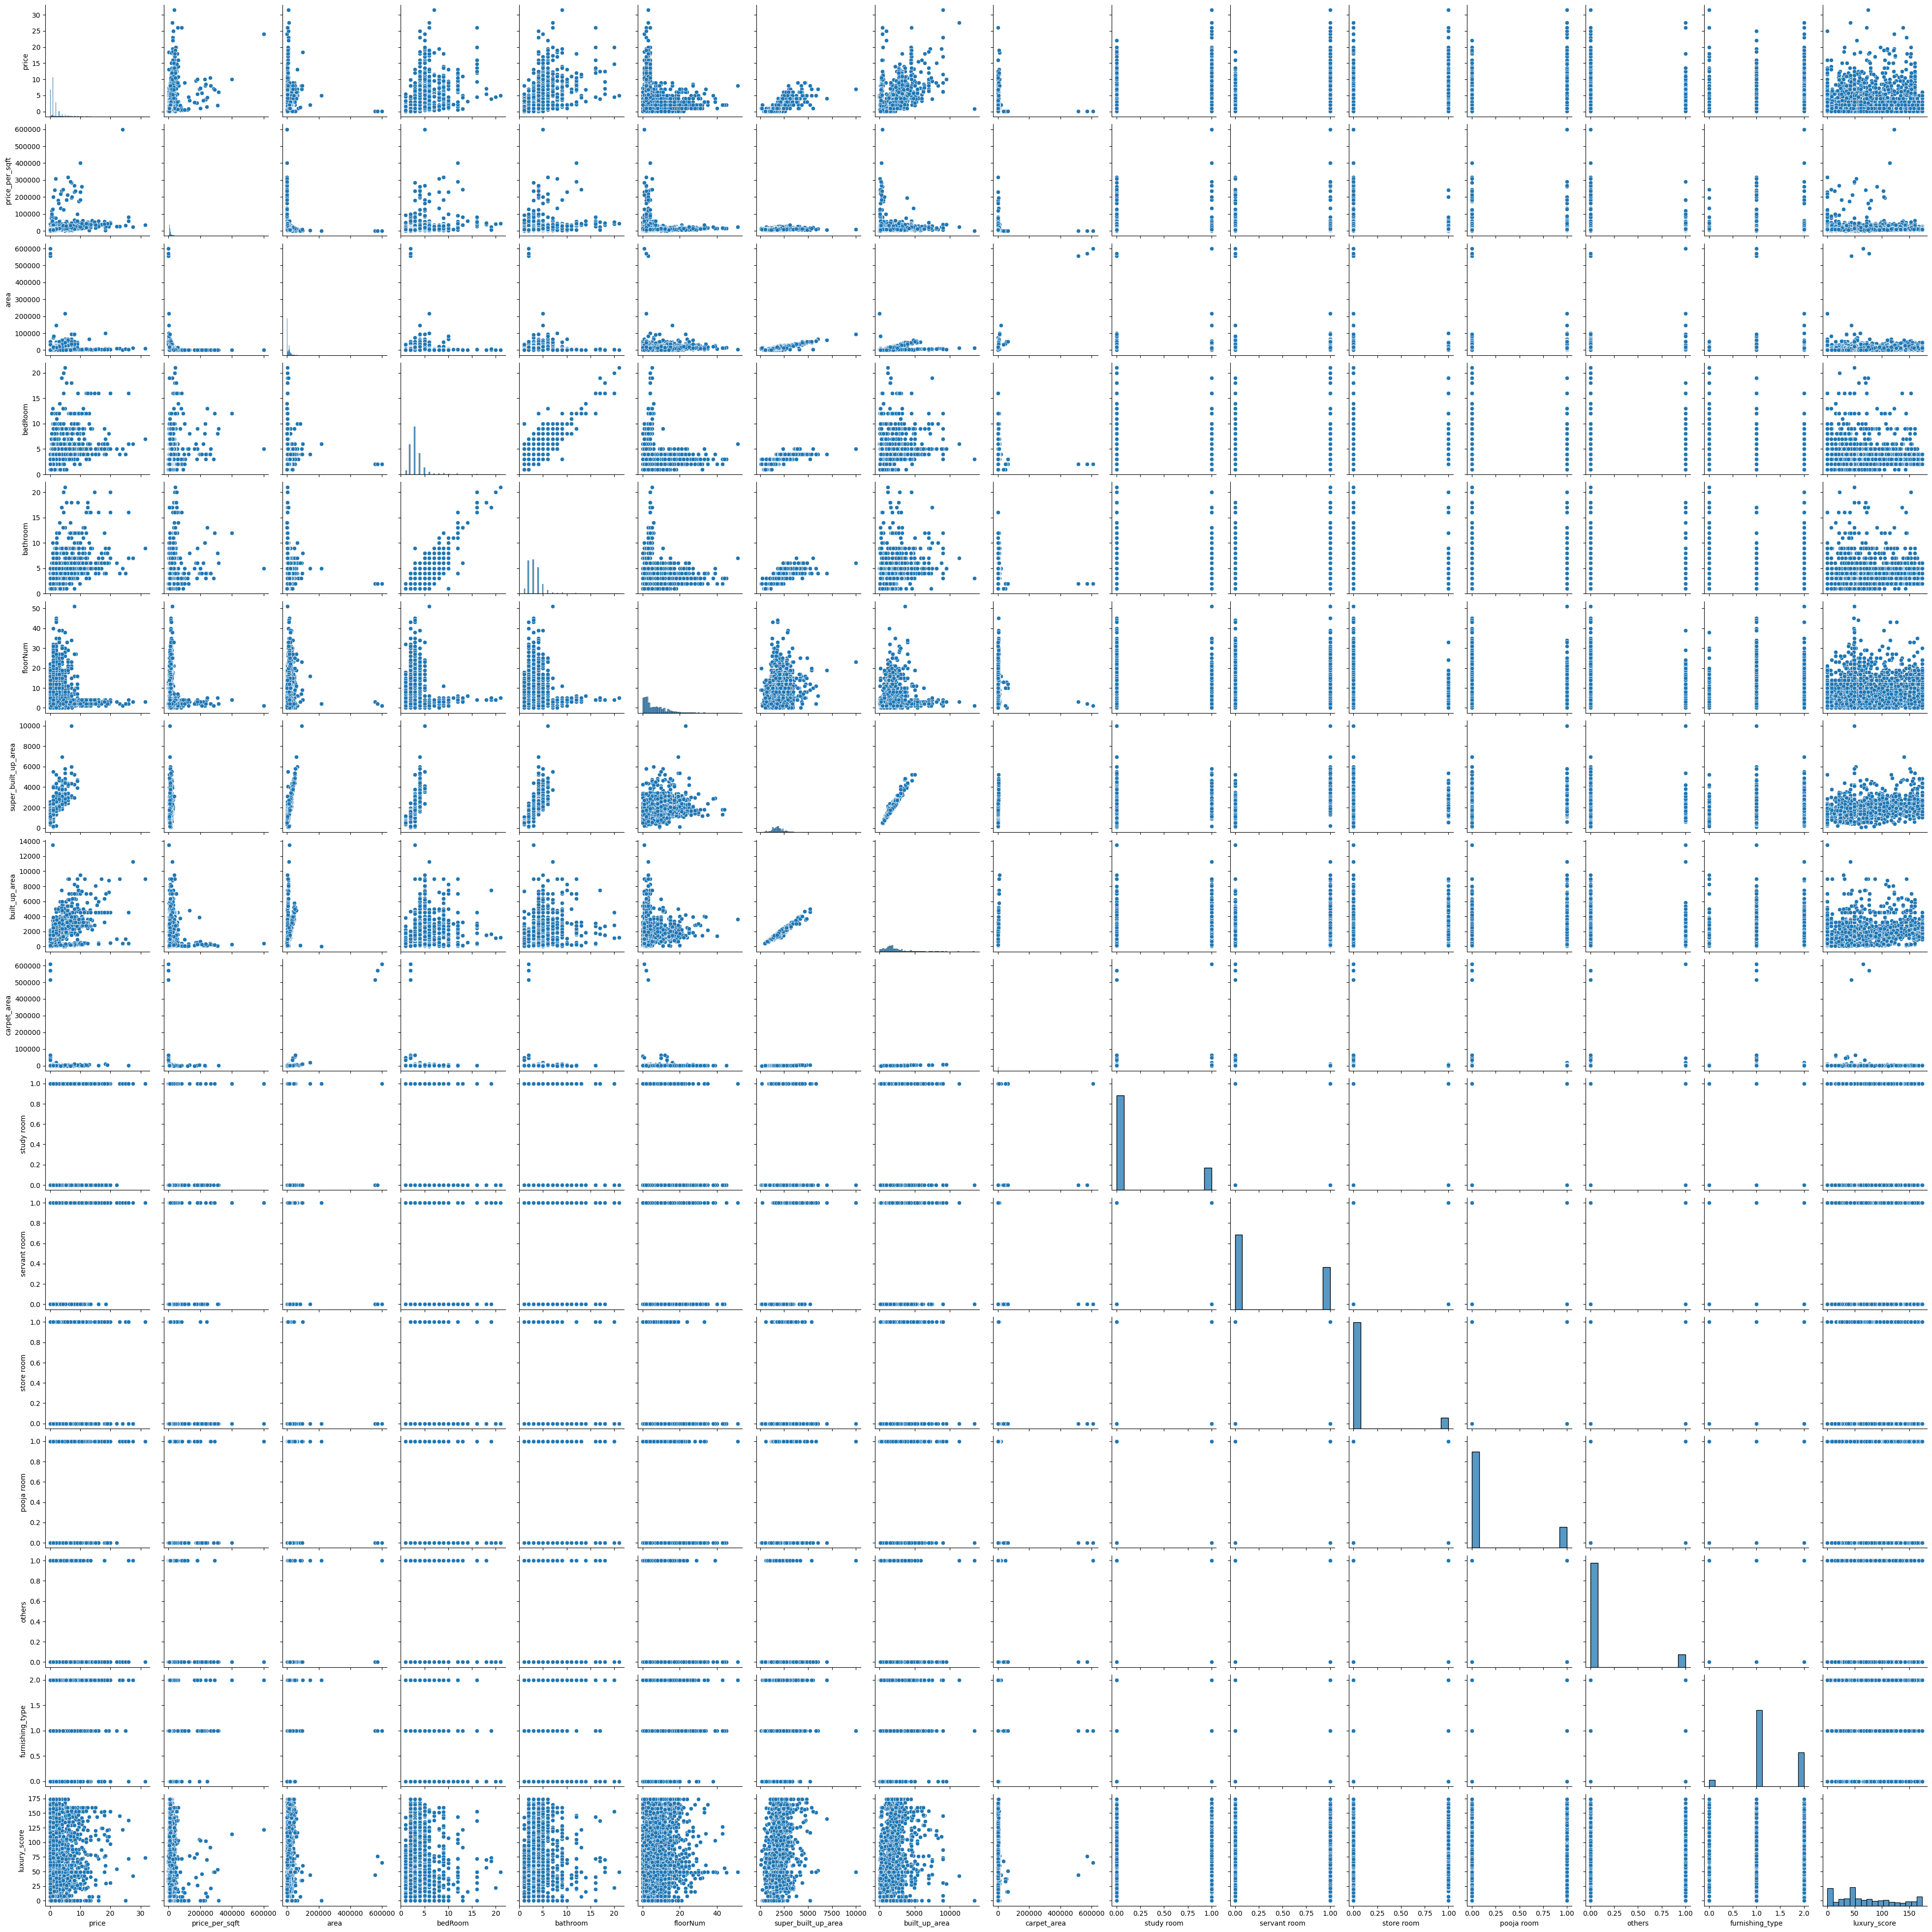

In [64]:
sns.pairplot(df)